In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from knn import KNN

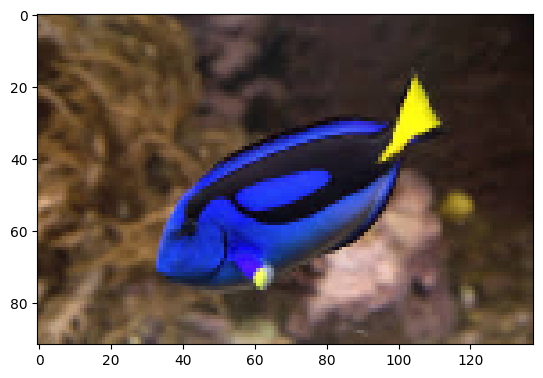

In [6]:
dory = cv2.imread("input/dory.jpg")
dory = cv2.resize(dory, (0, 0), fx=0.5, fy=0.5)
dory = cv2.cvtColor(dory, cv2.COLOR_BGR2RGB)
plt.imshow(dory)
plt.show()

In [7]:
dory.shape

(92, 138, 3)

In [8]:
pixels_list_rgb = dory.reshape(-1, 3)
pixels_list_rgb.shape

(12696, 3)

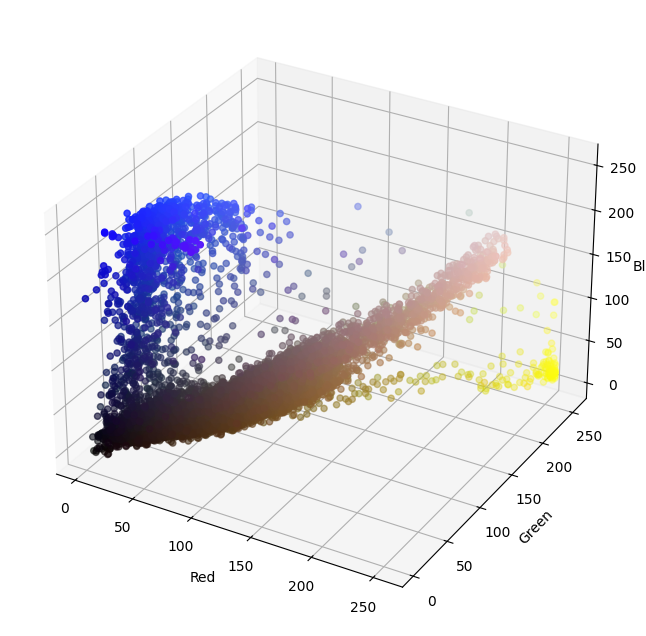

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pixels_list_rgb[:, 0], pixels_list_rgb[:, 1], pixels_list_rgb[:, 2], c=pixels_list_rgb / 255)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

In [10]:
dory_hsv = cv2.cvtColor(dory, cv2.COLOR_RGB2HSV)
pixels_list_hsv = dory_hsv.reshape(-1, 3)

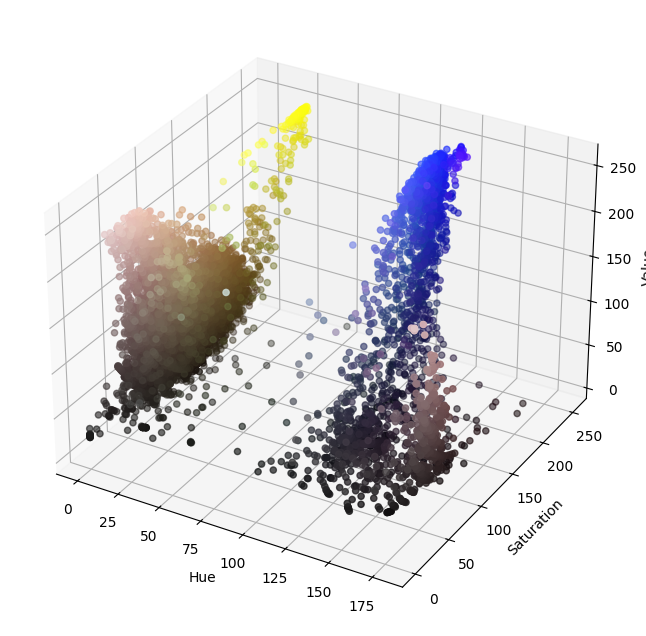

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pixels_list_hsv[:, 0], pixels_list_hsv[:, 1], pixels_list_hsv[:, 2], c=pixels_list_rgb / 255)
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
plt.show()

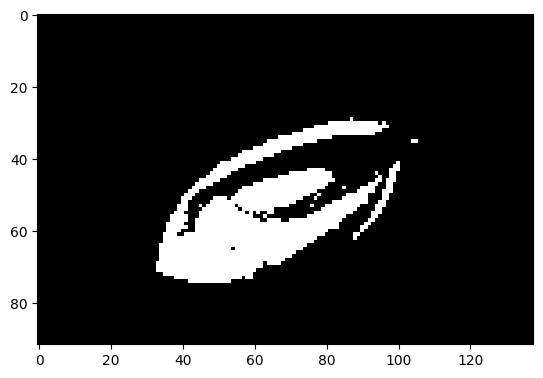

In [12]:
light_blue = (90, 155, 2)
dark_blue = (131, 250, 255)

mask_blue = cv2.inRange(dory_hsv, light_blue, dark_blue)
plt.imshow(mask_blue, cmap='gray')
plt.show()

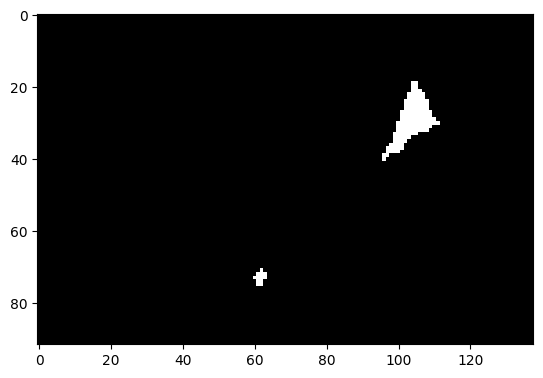

In [13]:
light_yellow = (23, 30, 185)
dark_yellow = (35, 265, 255)

mask_yellow = cv2.inRange(dory_hsv, light_yellow, dark_yellow)
plt.imshow(mask_yellow, cmap='gray')
plt.show()

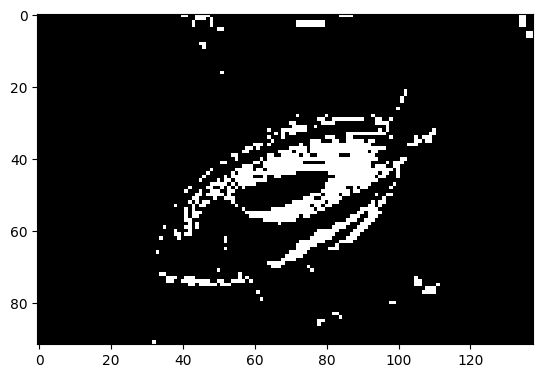

In [14]:
light_black = (110, 55, 0)
dark_black = (175, 200, 150)

mask_black = cv2.inRange(dory_hsv, light_black, dark_black)
plt.imshow(mask_black, cmap='gray')
plt.show()

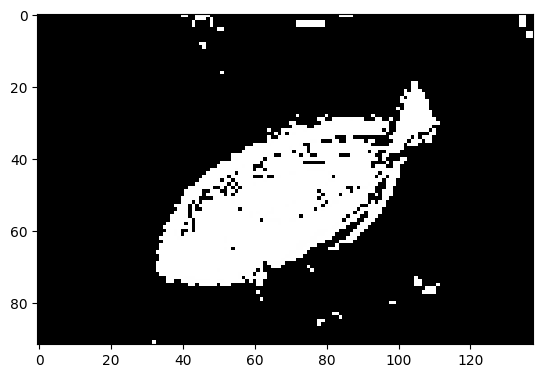

In [15]:
final_mask = mask_blue + mask_yellow + mask_black
plt.imshow(final_mask, cmap='gray')
plt.show()

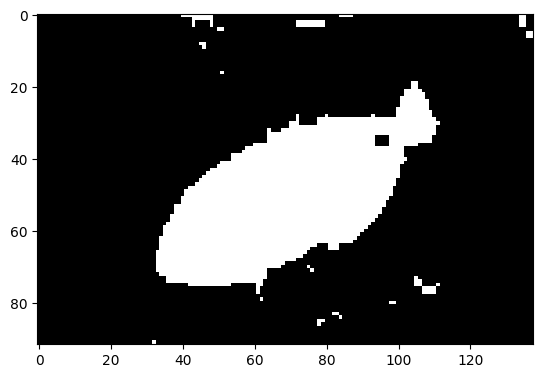

In [16]:
kernel = np.ones((3, 3), np.uint8)
image = cv2.dilate(final_mask , kernel, cv2.BORDER_TRANSPARENT) 
image = cv2.erode(image , kernel, cv2.BORDER_TRANSPARENT) 

plt.imshow(image , cmap="gray" )
plt.show()

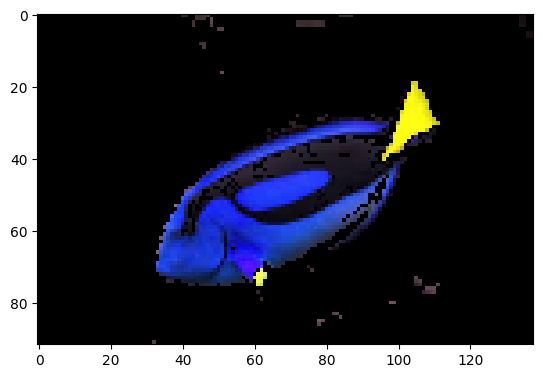

In [17]:
final_result = cv2.bitwise_and(dory, dory, mask=final_mask)
plt.imshow(final_result)
plt.show()

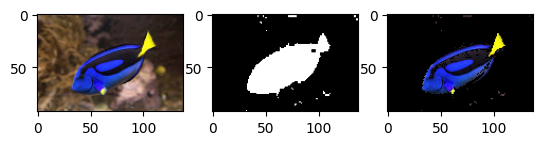

In [18]:
plt.subplot(1, 3, 1)
plt.imshow(dory, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(image, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(final_result)
plt.show()

Making dataset:

In [19]:
final_mask.shape

(92, 138)

In [20]:
X_train = pixels_list_hsv / 255
X_train.shape

(12696, 3)

In [21]:
Y_train = final_mask.reshape(-1,) // 255
Y_train.shape

(12696,)

Dataset is ready.

Implementing kNN algorithm:

In [22]:
knn = KNN(k=3)
knn.fit(X_train, Y_train)

In [23]:
new_pixel = np.array([10, 200, 255]) / 255
knn.predict([new_pixel])

[np.int64(1)]

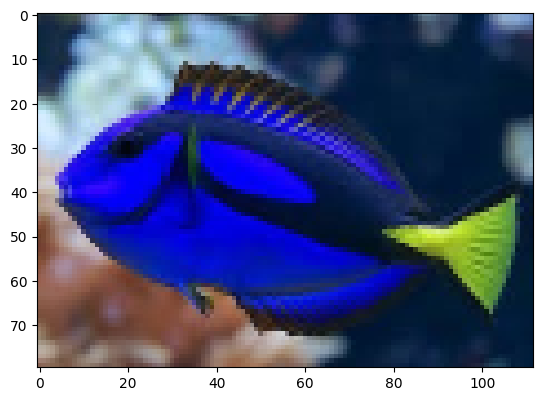

In [20]:
dory_1 = cv2.imread("input/dory_1.jpg")
dory_1 = cv2.resize(dory_1, (0, 0), fx=0.5, fy=0.5)
dory_1 = cv2.cvtColor(dory_1, cv2.COLOR_BGR2RGB)
plt.imshow(dory_1)
plt.show()

In [21]:
dory_1_hsv = cv2.cvtColor(dory_1, cv2.COLOR_RGB2HSV)
dory_1_hsv.shape

(80, 112, 3)

In [22]:
X_test = dory_1_hsv.reshape(-1, 3) / 255
X_test.shape

(8960, 3)

In [23]:
Y_pred = knn.predict(X_test)

In [24]:
Y_pred = np.array(Y_pred)

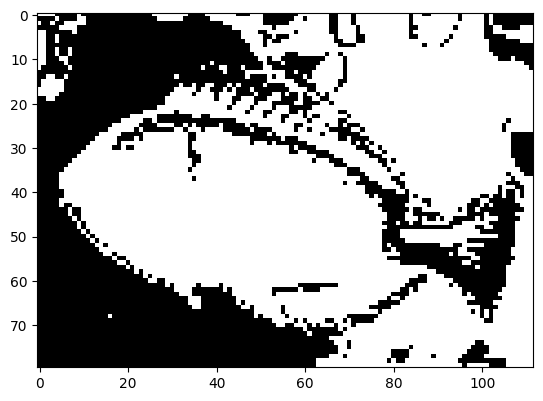

In [29]:
output_1 = Y_pred.reshape(dory_1.shape[:2])
plt.imshow(output_1, cmap='gray')
plt.show()

In [30]:
output_1.dtype

dtype('int64')

In [31]:
output = output_1.astype('uint8')

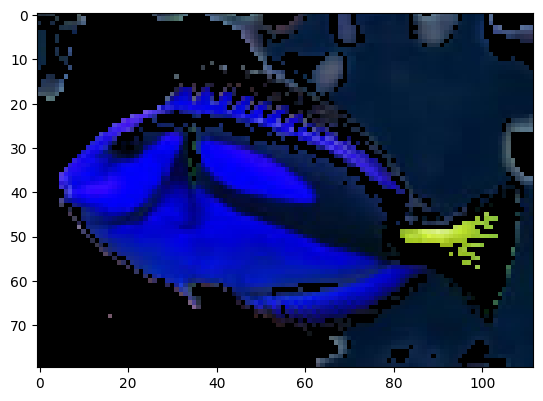

In [32]:
final_result_1 = cv2.bitwise_and(dory_1, dory_1, mask=output)
plt.imshow(final_result_1)
plt.show()

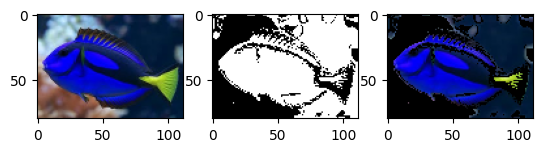

In [33]:
plt.subplot(1, 3, 1)
plt.imshow(dory_1, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(output_1, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(final_result_1)
plt.show()

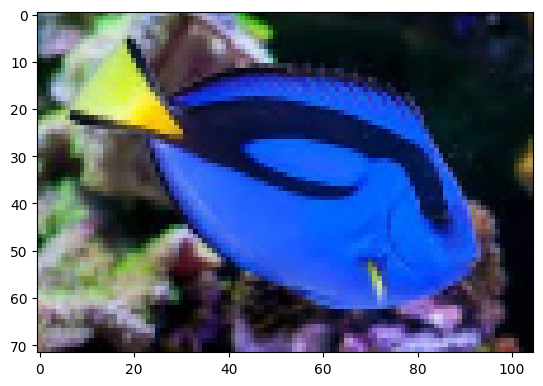

In [20]:
dory_2 = cv2.imread("input/dory_2.jpg")
dory_2 = cv2.resize(dory_2, (0, 0), fx=0.5, fy=0.5)
dory_2 = cv2.cvtColor(dory_2, cv2.COLOR_BGR2RGB)
plt.imshow(dory_2)
plt.show()

In [21]:
dory_nemo_hsv = cv2.cvtColor(dory_2, cv2.COLOR_RGB2HSV)
dory_nemo_hsv.shape

(72, 105, 3)

In [22]:
X_test = dory_nemo_hsv.reshape(-1, 3) / 255
X_test.shape

(7560, 3)

In [23]:
Y_pred = knn.predict(X_test)

In [24]:
Y_pred = np.array(Y_pred)

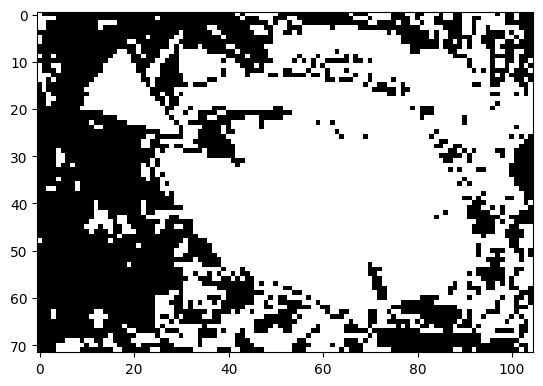

In [29]:
output_2 = Y_pred.reshape(dory_2.shape[:2])
plt.imshow(output_2, cmap='gray')
plt.show()

In [31]:
output_2.dtype

dtype('int64')

In [32]:
output = output_2.astype('uint8')

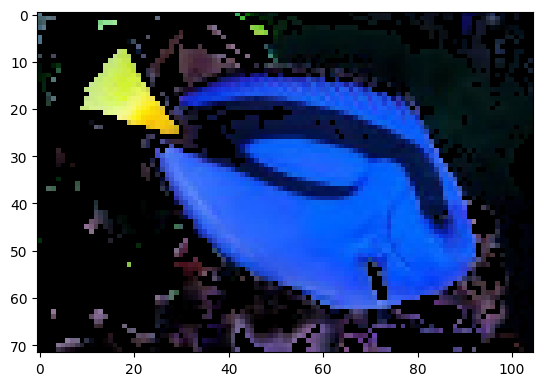

In [33]:
final_result_2 = cv2.bitwise_and(dory_2, dory_2, mask=output)
plt.imshow(final_result_2)
plt.show()

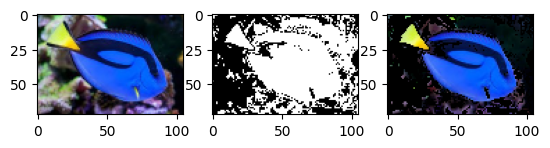

In [34]:
plt.subplot(1, 3, 1)
plt.imshow(dory_2, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(output_2, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(final_result_2)
plt.show()

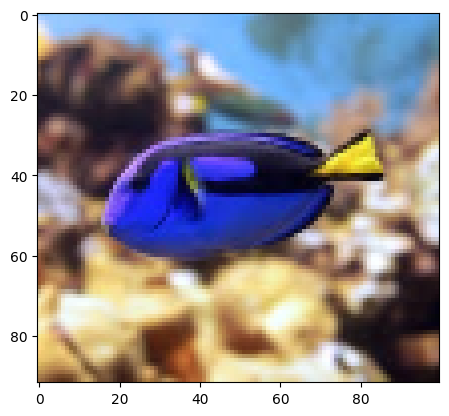

In [24]:
dory_3 = cv2.imread("input/dory_3.jpg")
dory_3 = cv2.resize(dory_3, (0, 0), fx=0.5, fy=0.5)
dory_3 = cv2.cvtColor(dory_3, cv2.COLOR_BGR2RGB)
plt.imshow(dory_3)
plt.show()

In [25]:
dory_3_hsv = cv2.cvtColor(dory_3, cv2.COLOR_RGB2HSV)
dory_3_hsv.shape

(92, 100, 3)

In [26]:
X_test = dory_3_hsv.reshape(-1, 3) / 255
X_test.shape

(9200, 3)

In [27]:
Y_pred = knn.predict(X_test)

In [28]:
Y_pred = np.array(Y_pred)

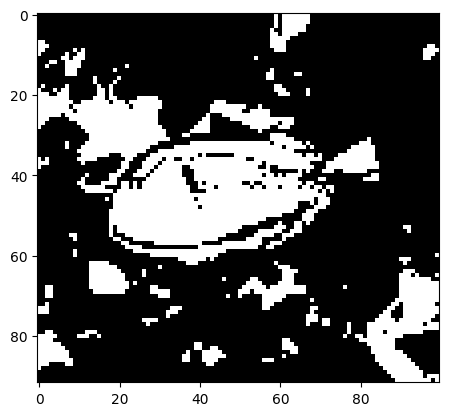

In [30]:
output_3 = Y_pred.reshape(dory_3.shape[:2])
plt.imshow(output_3, cmap='gray')
plt.show()

In [32]:
output_3.dtype

dtype('int64')

In [33]:
output = output_3.astype('uint8')

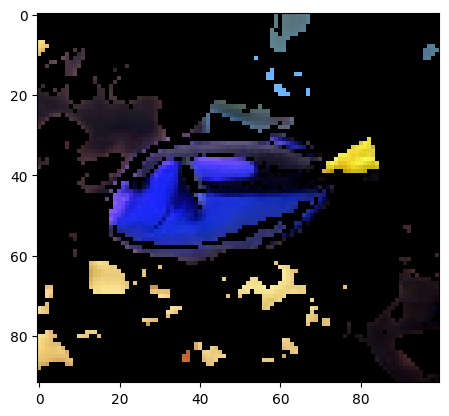

In [34]:
final_result_3 = cv2.bitwise_and(dory_3, dory_3, mask=output)
plt.imshow(final_result_3)
plt.show()

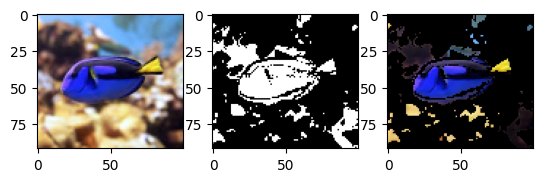

In [35]:
plt.subplot(1, 3, 1)
plt.imshow(dory_3, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(output_3, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(final_result_3)
plt.show()